In [2]:
import networkx as nx

#### Creating an empty graph-

In [3]:
G = nx.Graph()

#### Adding nodes one at a time or several at a time-

In [5]:
G.add_node(1)

In [6]:
G.add_nodes_from([2,3,4])

Nodes doesn't necesarily have to be numbers. Strings can be used.

In [8]:
G.add_nodes_from(["u","v"])

looking at the nodes-

In [10]:
G.nodes()

NodeView((1, 2, 3, 4, 'u', 'v'))

### Adding edges-

In [11]:
G.add_edge(1,2) # inserting an edge between nodes 1 and 2

In [12]:
G.add_edge("u","v")

In [13]:
G.add_edges_from([(1,3),(1,4),(1,5),(1,6)])
# 4tuples inside the list of the added edges which means 4 edges will be inserted, each connecting 2 nodes. 
# if the nodes are not alreday in the graph, Python automatically adds the nodes to the graph.

In [14]:
G.add_edge("u","w")

In [15]:
G.nodes()

NodeView((1, 2, 3, 4, 'u', 'v', 5, 6, 'w'))

In [16]:
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')])

 Removing nodes and edges-

In [17]:
G.remove_node(2)

In [18]:
G.nodes()

NodeView((1, 3, 4, 'u', 'v', 5, 6, 'w'))

In [19]:
G.remove_nodes_from([4,5])

In [20]:
G.nodes()

NodeView((1, 3, 'u', 'v', 6, 'w'))

In [21]:
G.remove_edge(1,3)

In [22]:
G.edges()

EdgeView([(1, 6), ('u', 'v'), ('u', 'w')])

In [24]:
G.remove_edges_from([(1,6),("u","v")])

In [25]:
G.nodes()

NodeView((1, 3, 'u', 'v', 6, 'w'))

In [26]:
G.edges()

EdgeView([('u', 'w')])

In [27]:
G.number_of_edges()

1

In [28]:
G.number_of_nodes()

6

## Visualizing graphs-

### Karate club graph

In [31]:
K = nx.karate_club_graph()

In [32]:
type(K)

networkx.classes.graph.Graph

In [33]:
import matplotlib.pyplot as plt

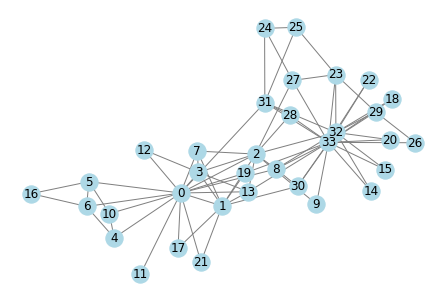

In [35]:
nx.draw(K, with_labels = True,node_color = "lightblue",edge_color = "gray")
plt.savefig("karate_graph.pdf")

In [37]:
K.degree() # keys are nodes, values are degrees associated with that node.

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [39]:
K.degree()[33] # uses dictionary method

17

In [40]:
K.degree(22) # same thing but uses the indexing

2

In [41]:
K.number_of_nodes(),K.number_of_edges()

(34, 78)

In [44]:
K.degree(0) is K.degree()[0]

True

## Generating an Erdos-Renyi (ER) graph-

In [49]:
from scipy.stats import bernoulli

In [64]:
bernoulli.rvs(p = 0.2) # mostly we get 0


0

In [65]:
bernoulli.rvs(p = 0.2)


0

In [66]:
bernoulli.rvs(p = 0.2)


0

In [70]:
N = 20
p = 0.2

In [79]:
(9,13) in G.edges()

True

In [146]:
def ER_graph_generator(N,p):
    """Takes 2 parameters, N(number of nodes) and p(probability of adding an edge between any pair of nodes).
    Generates an Erdos-Renyi Graph of N nodes with p probability."""
    G = nx.Graph()#create empty graph
    G.add_nodes_from(range(N))#insert N nodes
    for n1 in G.nodes():
        for n2 in G.nodes():
            if n1!=n2:
                if bernoulli.rvs(p=p) and n1<n2: # if and only if the rvs produces a 1 this statemnt will be executed # undirected and each node pair will be inserted just one time
                    G.add_edge(n1,n2)
    return G

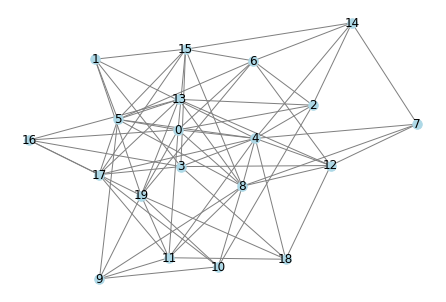

In [97]:
nx.draw(G,with_labels = True,node_size = 90,node_color = "lightblue",edge_color = "gray")

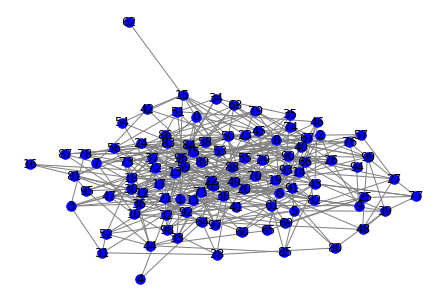

In [151]:
nx.draw(ER_graph_generator(100,0.08),with_labels = True,node_size = 90,node_color = "blue",edge_color = "gray")
plt.savefig("er2.pdf")

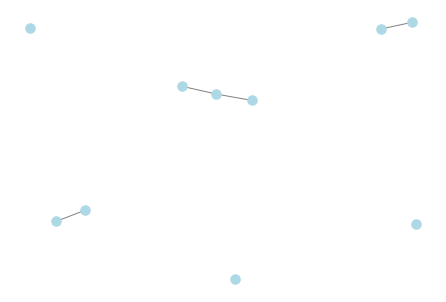

In [148]:
nx.draw(nx.erdos_renyi_graph(n = 10, p = 0.06),node_size = 90,node_color = "lightblue",edge_color = "gray") # 6 broken components

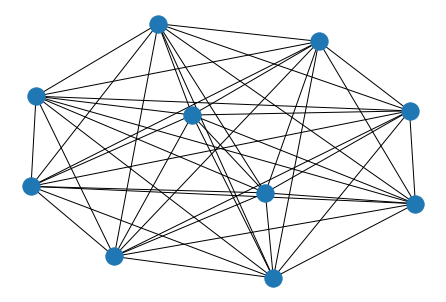

In [115]:
nx.draw(nx.erdos_renyi_graph(n = 10, p = 1)) # 1  component

In [130]:
for i in range(8):
    print(bernoulli.rvs(p = 1))

1
1
1
1
1
1
1
1


In [154]:
G.degree()

DegreeView({0: 9, 1: 5, 2: 6, 3: 7, 4: 12, 5: 9, 6: 7, 7: 4, 8: 10, 9: 5, 10: 5, 11: 7, 12: 7, 13: 7, 14: 5, 15: 8, 16: 5, 17: 8, 18: 5, 19: 9})

## Plotting the degree distribution

In [158]:
def plot_degree_distribution(G):
    """The input is a graph."""
    degree_seq = [d for n,d in G.degree()]
    plt.hist(degree_seq,histtype = "step")
    plt.xlabel("Degree $k$")
    plt.ylabel("P$(k)$")
    plt.title("Degree ditribution")
    

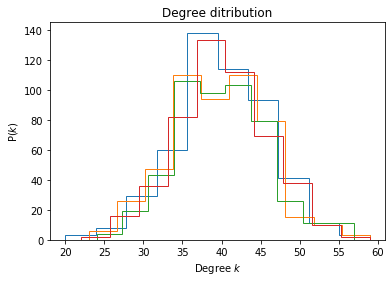

In [165]:
G1 = ER_graph_generator(500,0.08)
plot_degree_distribution(G1)
G2 = ER_graph_generator(500,0.08)
plot_degree_distribution(G2)
G3 = ER_graph_generator(500,0.08)
plot_degree_distribution(G3)
G4 = ER_graph_generator(500,0.08)
plot_degree_distribution(G4)
plt.savefig("hist3.pdf")


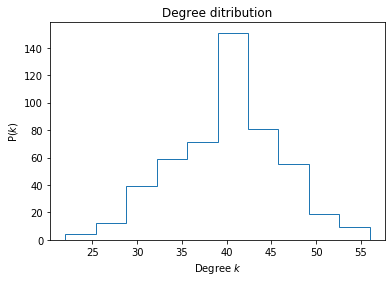

In [162]:
plot_degree_distribution(G)
plt.savefig("hist1.pdf")

TypeError: '<' not supported between instances of 'dict' and 'float'

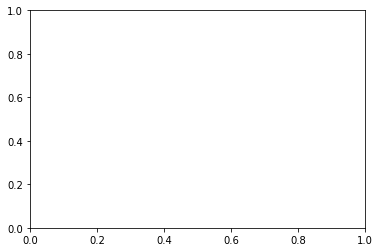

In [166]:
D = {1:1, 2:2, 3:3}
plt.hist(D)

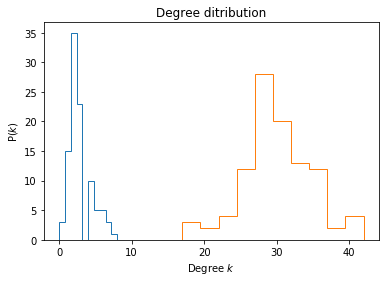

In [167]:
plot_degree_distribution(nx.erdos_renyi_graph(100, 0.03))
plot_degree_distribution(nx.erdos_renyi_graph(100, 0.30))

In [168]:
180/12

15.0

## Descriptive Statistics of Empirical Social Networks-